In [1]:
import pandas as pd

df_train = pd.read_csv('annotated_okezone.csv')
df_train = df_train.drop(['label'], 1)

df_test = pd.read_csv('annotated_fimela.csv')
df_test = df_test.drop(['label'], 1)

In [3]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(max_features=1000)
X_BoW = vectorizer.fit_transform(df_train.title)
# print(vectorizer.get_feature_names())

In [5]:
from sklearn.naive_bayes import MultinomialNB

clf = MultinomialNB()
clf.fit(X_BoW, df_train.label_score)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [6]:
vectorizer = CountVectorizer(max_features=1000)
X_BoW = vectorizer.fit_transform(df_test.title)

In [7]:
y = clf.predict(X_BoW)

In [8]:
print(y)

[1 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 0 1 1
 1 1 1 0 1 0 1 0 0 1 1 0 1 1 1 0 0 0 1 1 1 1 0 0 0 1 0 1 0 1 0 0 1 0 0 1 1
 0 1 0 1 1 0 1 1 0 0 1 1 1 0 0 1 1 0 1 0 1 1 1 1 1 1 1 0 1 0 1 1 0 1 1 1 1
 0 0 1 1 0 1 1 1 0 1 1 1 0 0 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1 1 0 1 1 1
 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 1 0 0 0 1 0 1 1 1 0 1 0 0 0 1
 0 0 1 0 0 0 0 0 0 0 1 1 0 1 1 1 0 1 0 1 0 1 0 1 1 1 1 0 0 1 0 1 1 1 0 1 1
 1 1 0 1 1 1 0 0 1 1 0 1 0 0 0 0 1 0 0 1 1 1 0 0 1 1 1 0 1 0 0 0 1 0 1 1 1
 0 0 1 1 1 1 0 1 0 0 1 0 1 1 1 1 0 1 0 1 0 1 1 1 1 0 0 1 0 0 0 0 1 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 1 1 1 1 0 0 1 1 0 1 0 0 1 0 1 1 1 1 1 0 0 0 0 0 1 0 0
 0 1 1 1 0 1 0 0 1 0 0 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 0 1 1 1 0 0 0 1 0 0 1
 1 1 1 1 1 0 1 0 1 1 1 1 1 0 0 0 0 1 0 1 0 1 1 0 0 1 0 1 0 0 0 0 0 1 0 1 1
 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 1 1 0 1 0 0 0 1 1 1 1 0
 1 0 0 1 1 0 1 1 0 1 0 1 0 0 0 1 0 1 1 0 1 0 0 1 1 0 0 1 1 0 1 1 1 0 0 1 1
 1 1 0 1 1 1 1 1 0 1 1 0 

In [11]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(df_test.label_score, y)

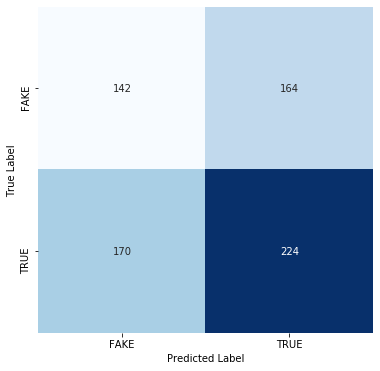

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=['FAKE', 'TRUE'], yticklabels=['FAKE', 'TRUE'], cmap=plt.cm.Blues, cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [14]:
tn, fp, fn, tp = confusion_matrix(df_test.label_score, y).ravel()

print((tp+tn)/(tp+fp+fn+tn))

0.5228571428571429


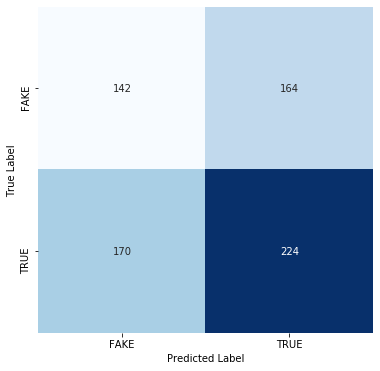

In [17]:
plt.figure(figsize=(6,6))
sns.heatmap([[tn,fp],[fn,tp]], annot=True, fmt='d', xticklabels=['FAKE', 'TRUE'], yticklabels=['FAKE', 'TRUE'], cmap=plt.cm.Blues, cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()